In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

def create_multiple_qq_plots(n_samples=100, n_plots=4):
    """
    Create multiple Q-Q plots for different distributions.
    
    Parameters:
    -----------
    n_samples : int
        Number of samples to generate
    n_plots : int
        Number of plots to create
    """
    fig, axes = plt.subplots(2, 2, figsize=(12, 12))
    
    # Generate data
    np.random.seed(42)  # for reproducibility
    normal_data = np.random.normal(0, 1, n_samples)
    exp_data = np.random.exponential(1, n_samples)
    unif_data = np.random.uniform(0, 1, n_samples)
    cauchy_data = stats.t.rvs(df=1, size=n_samples)  # t with df=1 is Cauchy
    
    # Create Q-Q plots
    stats.probplot(normal_data, dist="norm", plot=axes[0, 0])
    axes[0, 0].set_title("Normal Q-Q plot: normal data")
    
    stats.probplot(exp_data, dist="norm", plot=axes[0, 1])
    axes[0, 1].set_title("Normal Q-Q plot: exponential data")
    
    stats.probplot(unif_data, dist="norm", plot=axes[1, 0])
    axes[1, 0].set_title("Normal Q-Q plot: uniform data")
    
    stats.probplot(cauchy_data, dist="norm", plot=axes[1, 1])
    axes[1, 1].set_title("Normal Q-Q plot: Cauchy data")
    
    plt.tight_layout()
    plt.show()


In [3]:

def create_qq_plots_varying_n(distribution='normal', sizes=[10, 20, 50, 100]):
    """
    Create Q-Q plots for different sample sizes.
    
    Parameters:
    -----------
    distribution : str
        Type of distribution ('normal', 'exponential', 'uniform', 'cauchy')
    sizes : list
        List of sample sizes to try
    """
    fig, axes = plt.subplots(2, 2, figsize=(12, 12))
    
    for i, n in enumerate(sizes):
        row = i // 2
        col = i % 2
        
        if distribution == 'normal':
            data = np.random.normal(0, 1, n)
        elif distribution == 'exponential':
            data = np.random.exponential(1, n)
        elif distribution == 'uniform':
            data = np.random.uniform(0, 1, n)
        elif distribution == 'cauchy':
            data = stats.t.rvs(df=1, size=n)
        
        stats.probplot(data, dist="norm", plot=axes[row, col])
        axes[row, col].set_title(f"n = {n}")
    
    plt.suptitle(f"Q-Q Plots for {distribution.capitalize()} Distribution\nVarying Sample Sizes")
    plt.tight_layout()
    plt.show()

def create_custom_qq_plot(data, plot_type='exponential', title=None):
    """
    Create custom Q-Q plots for exponential and Pareto distributions.
    
    Parameters:
    -----------
    data : array-like
        Input data
    plot_type : str
        'exponential' or 'pareto'
    title : str
        Plot title
    """
    n = len(data)
    k = np.arange(1, n + 1)
    
    plt.figure(figsize=(8, 6))
    
    if plot_type == 'exponential':
        x = -np.log(1 - k/(n + 1))
        y = np.sort(data)
        if title is None:
            title = "Exponential Q-Q Plot"
        ylabel = "Ordered data"
    else:  # Pareto
        x = -np.log(1 - k/(n + 1))
        y = np.sort(np.log(data))
        if title is None:
            title = "Pareto Q-Q Plot"
        ylabel = "log(Ordered data)"
    
    plt.scatter(x, y, alpha=0.6)
    plt.plot([min(x), max(x)], [min(y), max(y)], 'r--', alpha=0.8)
    
    plt.title(title)
    plt.xlabel("-log[1 - k/(n+1)]")
    plt.ylabel(ylabel)
    plt.grid(True, alpha=0.3)
    plt.show()


OSError: 'seaborn' is not a valid package style, path of style file, URL of style file, or library style name (library styles are listed in `style.available`)

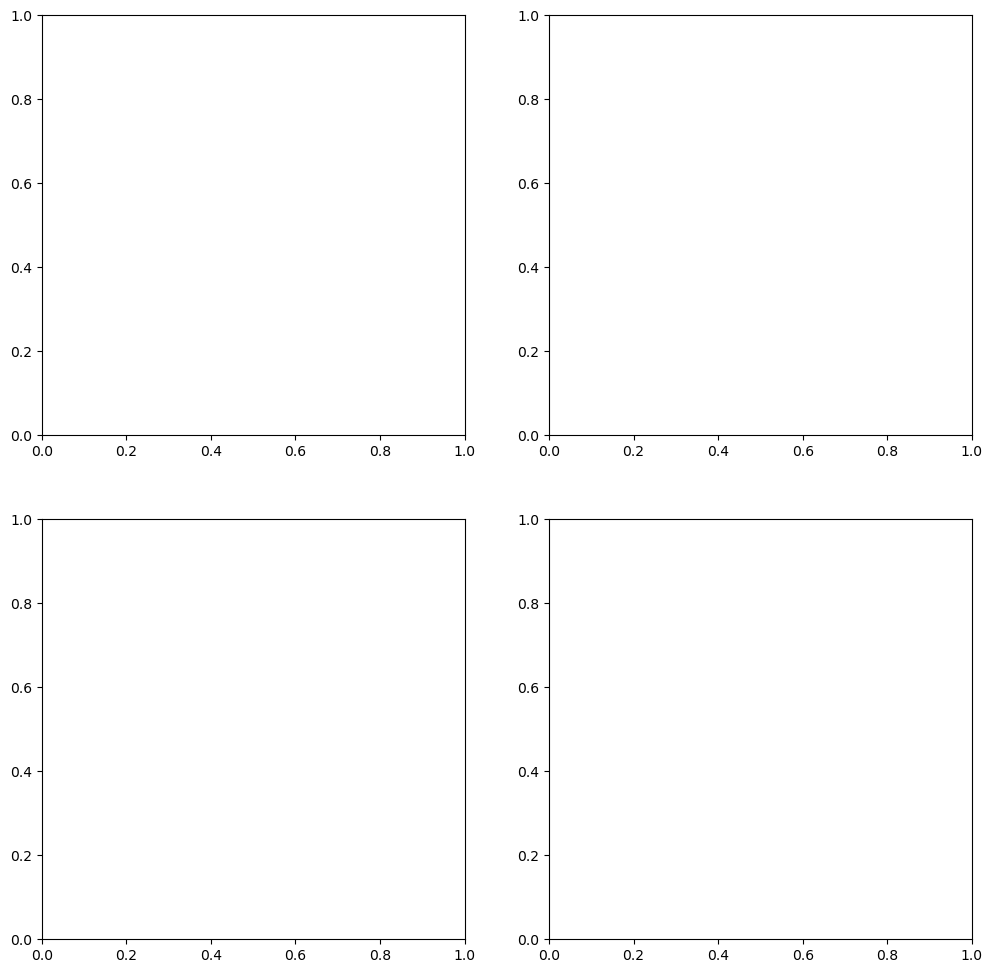

In [4]:

# Create basic comparison plots
create_multiple_qq_plots()

# Example of varying sample sizes for normal distribution
create_qq_plots_varying_n('normal', [10, 20, 50, 100])

# Example with exponential data
n = 100
exp_data = np.random.exponential(1, n)
create_custom_qq_plot(exp_data, 'exponential', "Exponential Q-Q Plot: Exponential Data")

# If we had the insurance data, we would use it like this:
# interarrivals = np.loadtxt("interarrivals.txt")
# amounts = np.loadtxt("amounts.txt")
# create_custom_qq_plot(interarrivals, 'exponential', "Exponential Q-Q Plot: Interarrivals")
# create_custom_qq_plot(amounts, 'pareto', "Pareto Q-Q Plot: Claim Amounts")